# Data Analytics Assignment 2024

## Problem Statement: How different factors effect student performance


## LOADING AND CLEANING THE DATASET

In [1]:
## Making all the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading data
stdData = pd.read_csv("StudentPerformanceFactors.csv")
stdData

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
stdData.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
stdData.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
stdData.shape

(6607, 20)

In [6]:
stdData.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
#Deletion of irrelevant columns
stdData = stdData.drop(columns=['Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'])

In [8]:
stdData.head

<bound method NDFrame.head of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

      Sleep_Hours Internet_Access Family_Income Teacher_Q

In [9]:
stdData.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score
0,23,84,Low,High,7,Yes,Low,Medium,Public,67
1,19,64,Low,Medium,8,Yes,Medium,Medium,Public,61
2,24,98,Medium,Medium,7,Yes,Medium,Medium,Public,74
3,29,89,Low,Medium,8,Yes,Medium,Medium,Public,71
4,19,92,Medium,Medium,6,Yes,Medium,High,Public,70


In [10]:
# Identifies duplicate columns
stdData.columns.value_counts()

Hours_Studied           1
Attendance              1
Parental_Involvement    1
Access_to_Resources     1
Sleep_Hours             1
Internet_Access         1
Family_Income           1
Teacher_Quality         1
School_Type             1
Exam_Score              1
Name: count, dtype: int64

In [15]:
# checks for missing (NaN) values in the stdData DataFrame and returns a count of how many missing values are in each column.
missing_values = stdData.isnull().sum()
missing_values

Hours_Studied            0
Attendance               0
Parental_Involvement     0
Access_to_Resources      0
Sleep_Hours              0
Internet_Access          0
Family_Income            0
Teacher_Quality         78
School_Type              0
Exam_Score               0
dtype: int64

In [23]:
#Finding the mode of column 'Teacher_Quality' to use it to replace null cells
mode_value = stdData['Teacher_Quality'].mode()[0]

In [25]:
mode_value

'Medium'

In [27]:
stdData.fillna(mode_value, inplace = True)

In [29]:
# checking if there are still empty cells
missing_values = stdData.isnull().sum()
missing_values

Hours_Studied           0
Attendance              0
Parental_Involvement    0
Access_to_Resources     0
Sleep_Hours             0
Internet_Access         0
Family_Income           0
Teacher_Quality         0
School_Type             0
Exam_Score              0
dtype: int64

In [31]:
# Checks for NaN or out-of-range values in Exam_Score
invalid_exam_scores = stdData[(stdData['Exam_Score'].isnull()) | (stdData['Exam_Score'] < 0) | (stdData['Exam_Score'] > 100)]
print(invalid_exam_scores)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1525             27          98                  Low              Medium   

      Sleep_Hours Internet_Access Family_Income Teacher_Quality School_Type  \
1525            6              No          High            High      Public   

      Exam_Score  
1525         101  


In [33]:
#Makes sure no mark exceeds 100 in the Exam_Score Table by replacing them with 100
stdData['Exam_Score'] = stdData['Exam_Score'].clip(upper=100)

In [35]:
# Making sure the code worked
invalid_exam_scores = stdData[(stdData['Exam_Score'].isnull()) | (stdData['Exam_Score'] < 0) | (stdData['Exam_Score'] > 100)]
print(invalid_exam_scores)

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Sleep_Hours, Internet_Access, Family_Income, Teacher_Quality, School_Type, Exam_Score]
Index: []


In [37]:
stdData

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score
0,23,84,Low,High,7,Yes,Low,Medium,Public,67
1,19,64,Low,Medium,8,Yes,Medium,Medium,Public,61
2,24,98,Medium,Medium,7,Yes,Medium,Medium,Public,74
3,29,89,Low,Medium,8,Yes,Medium,Medium,Public,71
4,19,92,Medium,Medium,6,Yes,Medium,High,Public,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,7,Yes,High,Medium,Public,68
6603,23,76,High,Medium,8,Yes,Low,High,Public,69
6604,20,90,Medium,Low,6,Yes,Low,Medium,Public,68
6605,10,86,High,High,6,Yes,Low,Medium,Private,68


In [1]:
# Count the occurrences of each performance category
performance_counts = stdData['Performance_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Performance Categories")
plt.show()


NameError: name 'stdData' is not defined

## MACHINE LEARNING: VALIDATION DATASET

In [19]:
# We imported this module to help us change string data to numeric data.
le = LabelEncoder()

In [20]:
# Here we are using the above module to pass the column name where our categorical data is. 
# It is worth mentioning that this approach wouldn't work well in columns with no Inherent order -- categories with no natural order like 'Red', 'Green', Yellow'
stdData['Parental_Involvement'] = le.fit_transform(stdData['Parental_Involvement'])
stdData['Access_to_Resources'] = le.fit_transform(stdData['Access_to_Resources'])
stdData['Internet_Access'] = le.fit_transform(stdData['Internet_Access'])
stdData['Family_Income'] = le.fit_transform(stdData['Family_Income'])
stdData['Teacher_Quality'] = le.fit_transform(stdData['Teacher_Quality'])
stdData['School_Type'] = le.fit_transform(stdData['School_Type'])

In [21]:
stdData.head() #visualizing changes

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score
0,23,84,1,0,7,1,1,2,1,67
1,19,64,1,2,8,1,2,2,1,61
2,24,98,2,2,7,1,2,2,1,74
3,29,89,1,2,8,1,2,2,1,71
4,19,92,2,2,6,1,2,0,1,70


In [22]:
#The exam score column has too many different values, which diminishes the capacity of the algorithm to make the right prediction.
#We are making a new column that will group ranges of scores into categories.
bins = [0, 50, 60, 70, 75, 101]  # Ranges for Fail, Pass, Credit, Merit, Distinction
labels = ['Fail', 'Pass', 'Credit', 'Merit', 'Distinction']  # Corresponding performance categories

# New column 'Performance_Category' being created based on the 'Exam_Score'
stdData['Performance_Category'] = pd.cut(stdData['Exam_Score'], bins=bins, labels=labels, right=False)

# Displaying the first few rows to verify
print(stdData[['Exam_Score', 'Performance_Category']].head())

   Exam_Score Performance_Category
0          67               Credit
1          61               Credit
2          74                Merit
3          71                Merit
4          70                Merit


In [23]:
#Making a copy of our table before deleting the Exam_Score column 
stdDataCopy = stdData

In [24]:
stdDataCopy

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score,Performance_Category
0,23,84,1,0,7,1,1,2,1,67,Credit
1,19,64,1,2,8,1,2,2,1,61,Credit
2,24,98,2,2,7,1,2,2,1,74,Merit
3,29,89,1,2,8,1,2,2,1,71,Merit
4,19,92,2,2,6,1,2,0,1,70,Merit
...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,7,1,0,2,1,68,Credit
6603,23,76,0,2,8,1,1,0,1,69,Credit
6604,20,90,2,1,6,1,1,2,1,68,Credit
6605,10,86,0,0,6,1,1,2,0,68,Credit


In [25]:
#Dropping Exam_Score
stdData = stdData.drop('Exam_Score', axis=1)

In [26]:
stdData

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Performance_Category
0,23,84,1,0,7,1,1,2,1,Credit
1,19,64,1,2,8,1,2,2,1,Credit
2,24,98,2,2,7,1,2,2,1,Merit
3,29,89,1,2,8,1,2,2,1,Merit
4,19,92,2,2,6,1,2,0,1,Merit
...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,7,1,0,2,1,Credit
6603,23,76,0,2,8,1,1,0,1,Credit
6604,20,90,2,1,6,1,1,2,1,Credit
6605,10,86,0,0,6,1,1,2,0,Credit


In [27]:
# Check for NaN values in the target column
print(stdData['Performance_Category'].isnull().sum())

0


## Machine :earning: Building our model
### With our dataset ready we can now build our model and test various algorithms using the cross valiation method

In [28]:
# Passing our data frame values to an array and dividing our data set into training data(x) and testing data(y)
array = stdData.values
X = array[:, 0:9]
Y = array[:, 9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [29]:
scoring = 'accuracy'

In [30]:
# I had to scale our training data because I was getting some an error in the logistic regression algorithm
# Error: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
#The solution was to scale the data set using the function below.
# StandardScaler helps normalize the features to have a mean of 0 and a standard deviation of 1, which can improve convergence during training.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
models = []
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    # Use the unscaled data for all models except Logistic Regression
    if name == 'LR':
        cv_results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring) ## Using our scaled train set here
    else:
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.853924 (0.014167)
LDA: 0.853546 (0.015571)
KNN: 0.840682 (0.013355)
CART: 0.794896 (0.016535)
NB: 0.853544 (0.010493)
SVM: 0.844087 (0.012632)


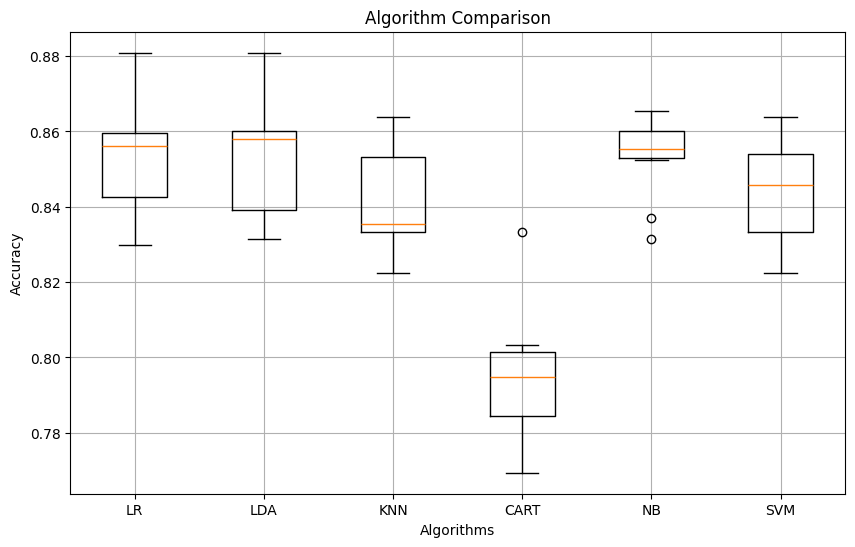

In [33]:
#Graph for better visualization of scores
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.grid()
plt.show()

In [34]:
lda = LogisticRegression(max_iter=200)
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.8305597579425114

[[930   2  54   5]
 [  8   0  13   0]
 [119   7 166   0]
 [ 16   0   0   2]]

              precision    recall  f1-score   support

      Credit       0.87      0.94      0.90       991
 Distinction       0.00      0.00      0.00        21
       Merit       0.71      0.57      0.63       292
        Pass       0.29      0.11      0.16        18

    accuracy                           0.83      1322
   macro avg       0.47      0.40      0.42      1322
weighted avg       0.81      0.83      0.82      1322



C:\Users\Snafe\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(stdData.shape)

(6607, 10)


In [36]:
# Check the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

X_train shape: (5285, 9)
Y_train shape: (5285,)


In [39]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=seed)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=7)

## MACHINE LEARNING: FEATURE OF IMPORTANCE
Still in progress...

                Feature  Importance
1            Attendance    0.357517
0         Hours_Studied    0.265948
4           Sleep_Hours    0.102707
3   Access_to_Resources    0.073962
2  Parental_Involvement    0.061137
6         Family_Income    0.054025
7       Teacher_Quality    0.040334
8           School_Type    0.027441
5       Internet_Access    0.016928


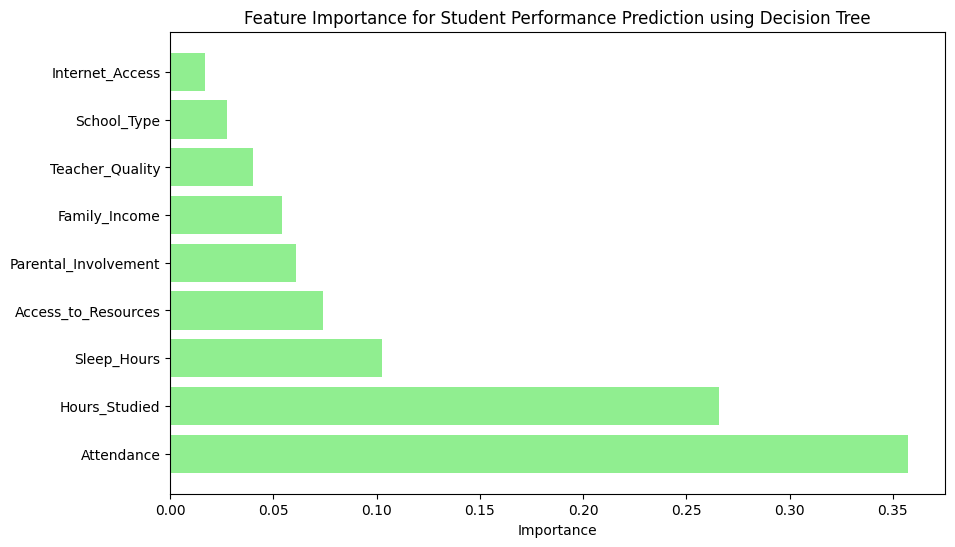

In [41]:
# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': stdDataCopy.columns[0:9], 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance for Student Performance Prediction using Decision Tree')
plt.show()
